In [1]:
# Thursday-WorkingHours-rs-Morning-WebAttacks.pca

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='utf-8')
df.dtypes
# df['Destination-Port'] = df['Destination-Port'].astype(str, errors = 'raise')
dfn = df.convert_dtypes()
df.head(10)
# dfn.dtypes
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  Int64  
 1    Flow Duration                170366 non-null  Int64  
 2    Total Fwd Packets            170366 non-null  Int64  
 3    Total Backward Packets       170366 non-null  Int64  
 4   Total Length of Fwd Packets   170366 non-null  Int64  
 5    Total Length of Bwd Packets  170366 non-null  Int64  
 6    Fwd Packet Length Max        170366 non-null  Int64  
 7    Fwd Packet Length Min        170366 non-null  Int64  
 8    Fwd Packet Length Mean       170366 non-null  Float64
 9    Fwd Packet Length Std        170366 non-null  Float64
 10  Bwd Packet Length Max         170366 non-null  Int64  
 11   Bwd Packet Length Min        170366 non-null  Int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [3]:
dfn.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,174.012282,0.63663,1592893.873,4597264.595,16500000,3,113000000,2406286.489,5491986.114,16500000,3,113000000,4917177.522,7084368.263,16500000,3,1,0,0,0,1536,768,0.42442,0.21221,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.5,575837.2562,1629110,379,13800000.0,4277541.062,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.95,208.261294,212.225377,0.951762,1060501.925,3813685.451,16500000,2,113000000,1693637.403,4719143.265,16500000,2,113000000,2908399.744,5922355.273,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.95,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,503426.946,1424245,325,13800000.0,4229413.12,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.250568,805003.4564,5277836.772,60100000,0,120000000,805003.4564,5277836.772,60100000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.250568,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,11700000.0,20400000,6,24400000.0,24300000.0,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.0,653.594166,108.708769,0.265508,4017461.867,15500000.0,60000000,1,60300000,7532741.0,21200000.0,60000000,311,211947,35324.5,27504.33405,57109,48,0,0,0,0,192,152,0.149348,0.11616,0,1460,385.352941,532.094087,283124.1176,0,0,0,1,0,0,0,0,0,409.4375,258.888889,603.0,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.0,0.0,161,161,161.0,0.0,1576208.178,14869.88848,89.666667,148.379019,261,4,4,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.0,60.249481,3630.0,0,0,0,0,0,0,0,0,1,118.75,51.0,161.0,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [52]:
target = dfn[' Label']
inputs = dfn
target.sample(10)

58020     BENIGN
128369    BENIGN
150428    BENIGN
68912     BENIGN
59238     BENIGN
99620     BENIGN
83125     BENIGN
36119     BENIGN
113538    BENIGN
164133    BENIGN
Name:  Label, dtype: string

In [4]:
dfn.to_csv('all_data.csv', encoding='utf-8')

In [53]:
tag = df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � Sql Injection        21
Web Attack � XSS                 652
Name:  Label, dtype: int64

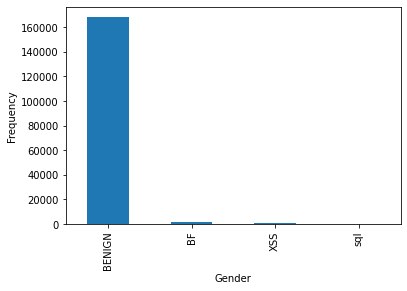

In [64]:
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3], ['BENIGN', 'BF', 'XSS', 'sql'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=dfn.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

0.020573353838207156
(170366, 76)
(170366, 76) 627040576.0
0 --- 65529.0
1 --- 119999992.0
2 --- 200755.0
3 --- 270686.0
4 --- 1197199.0
5 --- 627000000.0
6 --- 23360.0
7 --- 1729.0
8 --- 4183.05712890625
9 --- 5463.49365234375
10 --- 13140.0
11 --- 1460.0
12 --- 3494.917236328125
13 --- 3433.501953125
14 --- 120000000.0
15 --- 84800000.0
16 --- 120000000.0
17 --- 120000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 83200000.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 83300000.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 0.0
31 --- 0.0
32 --- 4173072.0
33 --- 5413720.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1359.0
37 --- 23360.0
38 --- 2155.52392578125
39 --- 3796.583740234375
40 --- 14400000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 0.0
48 --- 1.0
49 --- 10.0
50 --- 2784.0
51 --- 4183.05712890625
52 --- 3494.917236328125
53 --- 4173072.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
5

In [90]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(119256, 76) 119256 (51110, 76) 51110


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [91]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#print(x_train.shape,np.max(np.max(x_train)))
#x_train.dropna(with_inf=True)
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 35)
dtc = dtc.fit(x_train,y_train)

(119256, 76) (119256,)


In [98]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,35):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,35), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

34
34


No handles with labels found to put in legend.


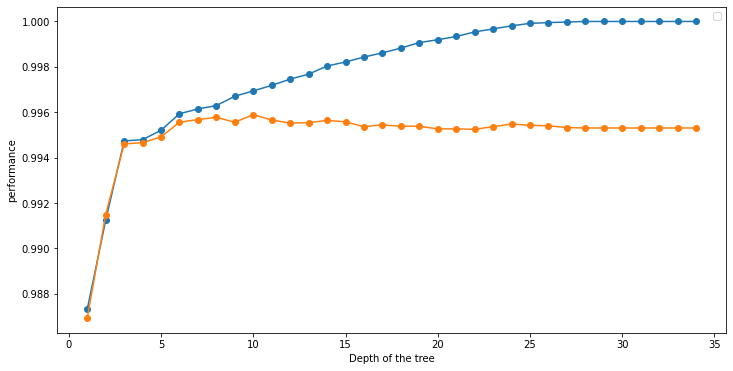

In [103]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [104]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.9948933672471141
0.9948933672471141
0.4674721274811888


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [89]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

# Subflow F.Bytes 0.0239
# Total Len F.Packets 0.0158
# F.Packet Len Mean 0.0025
# B.Packets/s 0.002

[(0.6622916253551673, ' Init_Win_bytes_backward'),
 (0.20123616677963022, ' Fwd IAT Min'),
 (0.04857855843570551, ' Bwd Packets/s'),
 (0.023725624278134714, ' Subflow Fwd Bytes'),
 (0.02143479758301874, 'Total Length of Fwd Packets'),
 (0.01925861758656167, ' Fwd IAT Std'),
 (0.008301769721109133, ' Bwd IAT Min'),
 (0.004879726168916989, ' Destination Port'),
 (0.004210406668092957, ' Flow IAT Min'),
 (0.002591019488057209, ' Flow IAT Std'),
 (0.002591019488057209, ' Active Min'),
 (0.0009006684475483245, ' Max Packet Length'),
 (0.0, 'Subflow Fwd Packets'),
 (0.0, 'Init_Win_bytes_forward'),
 (0.0, 'Idle Mean'),
 (0.0, 'Fwd Packets/s'),
 (0.0, 'Fwd PSH Flags'),
 (0.0, 'Fwd IAT Total'),
 (0.0, 'Fwd Avg Bytes/Bulk'),
 (0.0, 'FIN Flag Count'),
 (0.0, 'Bwd Packet Length Max'),
 (0.0, 'Bwd IAT Total'),
 (0.0, 'Bwd Avg Bulk Rate'),
 (0.0, 'Active Mean'),
 (0.0, ' min_seg_size_forward'),
 (0.0, ' act_data_pkt_fwd'),
 (0.0, ' URG Flag Count'),
 (0.0, ' Total Length of Bwd Packets'),
 (0.0, ' T

In [79]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))

---------------------------Random Forest CLassifier------------------
0.9951208059107951


In [80]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.11326084715177773, ' Fwd IAT Min'),
 (0.08765169824095914, ' Init_Win_bytes_backward'),
 (0.07642624377038329, ' Flow IAT Min'),
 (0.07051155950876124, ' Packet Length Mean'),
 (0.06850856900627299, ' Fwd Header Length'),
 (0.06545414729319834, ' Bwd Packets/s'),
 (0.057410117121135903, ' Fwd IAT Std'),
 (0.05412776826403657, ' Subflow Fwd Bytes'),
 (0.04275514679359692, ' Fwd IAT Mean'),
 (0.04110481422676489, ' Packet Length Std'),
 (0.03781759637313703, ' Average Packet Size'),
 (0.029813787212660182, ' Flow Duration'),
 (0.029209230061168344, ' Flow IAT Mean'),
 (0.02770340291505774, 'Init_Win_bytes_forward'),
 (0.02351981925437301, 'Fwd Packets/s'),
 (0.022949452716768477, ' Fwd IAT Max'),
 (0.020640849564747436, ' Flow IAT Max'),
 (0.019067064810407798, ' Avg Fwd Segment Size'),
 (0.016904017639493465, 'Fwd IAT Total'),
 (0.01641485198990942, ' Destination Port'),
 (0.016155551619626618, ' Flow IAT Std'),
 (0.010209814762285874, ' Bwd Packet Length Mean'),
 (0.008231500197628

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

[(0.5330824629299012, ' Init_Win_bytes_backward'),
 (0.222302796551712, ' Fwd IAT Min'),
 (0.04593414436213587, ' Flow IAT Min'),
 (0.022032862219707162, 'Fwd IAT Total'),
 (0.016937041093552554, ' Bwd Packets/s'),
 (0.0151686250349658, ' Flow IAT Max'),
 (0.01325635047187886, 'Fwd Packets/s'),
 (0.013243039064356404, ' Flow Duration'),
 (0.01321981126491209, ' Fwd IAT Mean'),
 (0.013059291483736432, ' Flow IAT Std'),
 (0.01235046898172677, 'Init_Win_bytes_forward'),
 (0.010113852211830495, ' Bwd IAT Min'),
 (0.009298599299240448, ' Flow IAT Mean'),
 (0.009137188185968054, ' Fwd IAT Max'),
 (0.009012652523088777, ' Subflow Fwd Bytes'),
 (0.007151150611738759, 'Total Length of Fwd Packets'),
 (0.0063903450641642, ' Fwd IAT Std'),
 (0.004954436416650174, ' Fwd Packet Length Max'),
 (0.004569085054705107, ' Avg Fwd Segment Size'),
 (0.003888368383452475, ' Bwd IAT Mean'),
 (0.003475572337350348, ' Destination Port'),
 (0.0019417645033390051, ' Packet Length Variance'),
 (0.001931867598690

In [83]:
print(regressor.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label='positive', average='macro'))

0.6739084163862772
0.9949667260974518
0.6199625988091457


/home/mak/miniconda3/envs/stat-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [1]:
print('hi')

hi
